# Exploratory Data Analysis on Customer Behaviour Analysis of Travel Data
#### By Vedant Thakur

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [129]:
df = pd.read_csv('Customer Behaviour Dataset.csv')

In [130]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


In [131]:
print('No. of rows:', df.shape[0],'\nNo of columns:', df.shape[1])

No. of rows: 11760 
No of columns: 17


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [133]:
df = df.dropna()

In [134]:
df['Yearly_avg_view_on_travel_page'] = pd.to_numeric(df['Yearly_avg_view_on_travel_page']).astype('int64')
df['total_likes_on_outstation_checkin_given'] = pd.to_numeric(df['total_likes_on_outstation_checkin_given']).astype('int64')
df['Yearly_avg_comment_on_travel_page'] = pd.to_numeric(df['Yearly_avg_comment_on_travel_page']).astype('int64')
df['Adult_flag'] = pd.to_numeric(df['Adult_flag'], errors='coerce').astype('int64')
df['Daily_Avg_mins_spend_on_traveling_page'] = pd.to_numeric(df['Daily_Avg_mins_spend_on_traveling_page']).astype('int64')
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*', np.nan)
df['total_likes_on_outstation_checkin_given'] = pd.to_numeric(df['total_likes_on_outstation_checkin_given'], errors='coerce')
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].fillna(0).astype(int)
df = df.dropna(subset = ['total_likes_on_outstation_checkin_given'])
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].astype('int64')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10455 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   UserID                                        10455 non-null  int64 
 1   Taken_product                                 10455 non-null  object
 2   Yearly_avg_view_on_travel_page                10455 non-null  int64 
 3   preferred_device                              10455 non-null  object
 4   total_likes_on_outstation_checkin_given       10455 non-null  int64 
 5   yearly_avg_Outstation_checkins                10455 non-null  int64 
 6   member_in_family                              10455 non-null  object
 7   preferred_location_type                       10455 non-null  object
 8   Yearly_avg_comment_on_travel_page             10455 non-null  int64 
 9   total_likes_on_outofstation_checkin_received  10455 non-null  int64 
 10  wee

In [136]:
df['Adult_flag'] = df['Adult_flag'].map({1: 'Yes', 0: 'No'}).fillna('Unknown')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10455 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   UserID                                        10455 non-null  int64 
 1   Taken_product                                 10455 non-null  object
 2   Yearly_avg_view_on_travel_page                10455 non-null  int64 
 3   preferred_device                              10455 non-null  object
 4   total_likes_on_outstation_checkin_given       10455 non-null  int64 
 5   yearly_avg_Outstation_checkins                10455 non-null  int64 
 6   member_in_family                              10455 non-null  object
 7   preferred_location_type                       10455 non-null  object
 8   Yearly_avg_comment_on_travel_page             10455 non-null  int64 
 9   total_likes_on_outofstation_checkin_received  10455 non-null  int64 
 10  wee

In [138]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307,iOS and Android,38570,1,2,Financial,94,5993,8,Yes,11,No,1,No,8
1,1000002,No,367,iOS,9765,1,1,Financial,61,5130,1,No,23,Yes,4,Yes,10
2,1000003,Yes,277,iOS and Android,48055,1,2,Other,92,2090,6,Yes,15,No,2,No,7
3,1000004,No,247,iOS,48720,1,4,Financial,56,2909,1,Yes,11,No,3,No,8
4,1000005,No,202,iOS and Android,20685,1,1,Medical,40,3468,9,No,12,No,4,Yes,6


In [139]:
df.isnull().sum()

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

#### Visualisation

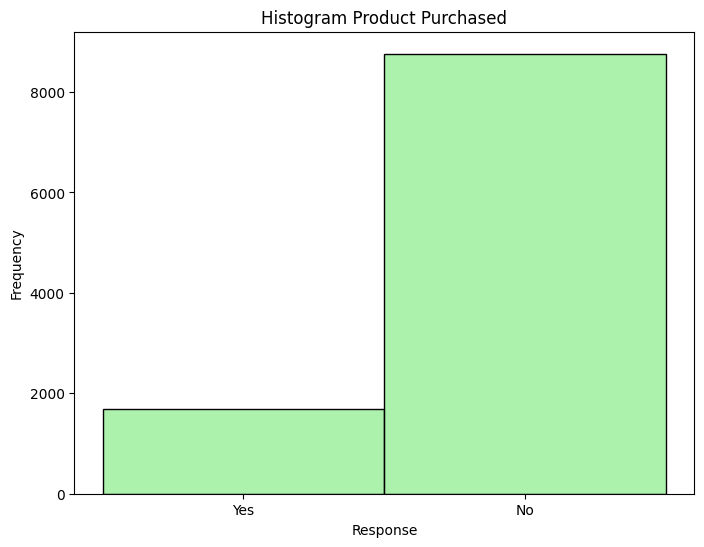

In [140]:
plt.figure(figsize=(8,6))
sns.histplot(df['Taken_product'], color='lightgreen')
plt.title('Histogram Product Purchased')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.show()

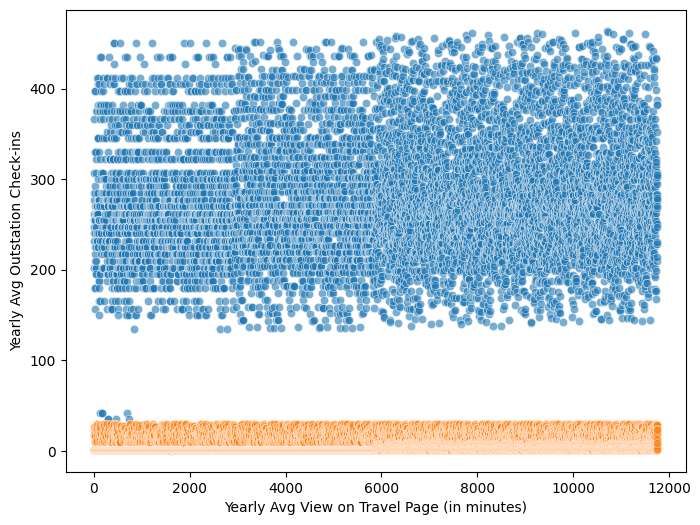

In [141]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['Yearly_avg_view_on_travel_page'], alpha=0.6, edgecolor='w')
sns.scatterplot(df['yearly_avg_Outstation_checkins'], alpha=0.6, edgecolor='w')
plt.xlabel('Yearly Avg View on Travel Page (in minutes)')
plt.ylabel('Yearly Avg Outstation Check-ins')
plt.show()

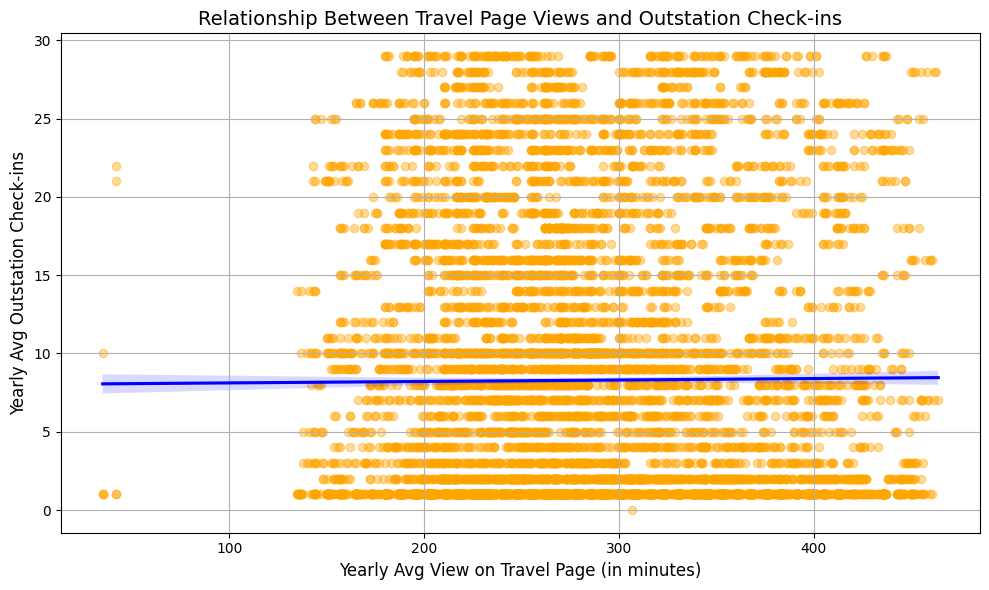

In [142]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Yearly_avg_view_on_travel_page',
    y='yearly_avg_Outstation_checkins',
    data=df,
    scatter_kws={'alpha': 0.4, 'color': 'orange'},
    line_kws={'color': 'blue'}
)
plt.title('Relationship Between Travel Page Views and Outstation Check-ins', fontsize=14)
plt.xlabel('Yearly Avg View on Travel Page (in minutes)', fontsize=12)
plt.ylabel('Yearly Avg Outstation Check-ins', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

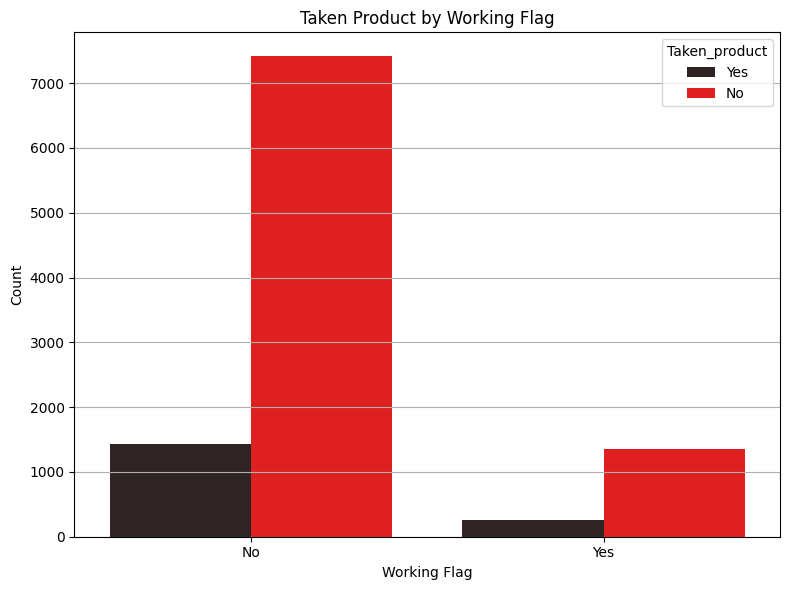

In [150]:
plt.figure(figsize=(8, 6))
sns.countplot(x='working_flag', hue='Taken_product', data=df, palette='dark:red')
plt.title('Taken Product by Working Flag')
plt.xlabel('Working Flag')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

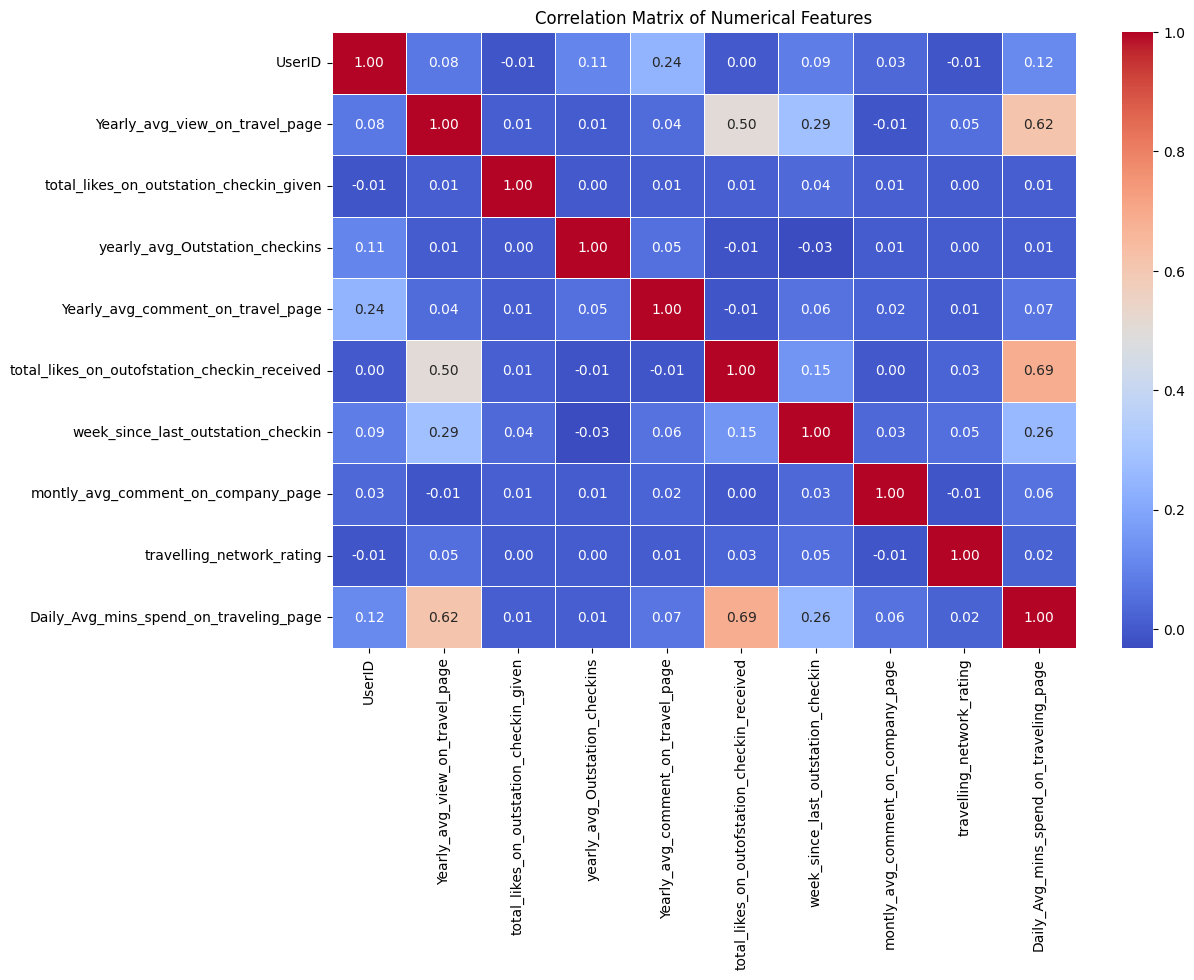

In [152]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()